In [1]:
import pandas as pd
import numpy as np

X_scaler_df_TOTdrop = pd.read_csv('../data/X_scaler_df_TOTdrop.csv')
X_scaler1 = pd.read_csv('../data/X_scaler1.csv')
high_schools = pd.read_csv('../data/high_schools.csv')

In [2]:
X_scaler_df_TOTdrop = X_scaler_df_TOTdrop.iloc[:,:]
X_scaler1 = X_scaler1.iloc[:,:]
y = high_schools['ACT']

In [3]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaler_df_TOTdrop, y, test_size=.2, random_state=1)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.25, random_state=1)

In [4]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaler1, y, test_size=.2, random_state=1)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.25, random_state=1)

In [5]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor()

spaceTree={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [6]:
from sklearn.model_selection import GridSearchCV

treeSearch = GridSearchCV(reg_tree, spaceTree, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=3)

In [7]:
treeResult_TOT = treeSearch.fit(X1_val, y1_val)
treeResult = treeSearch.fit(X2_val, y2_val)

print('Best Score TOT: %s' % treeResult_TOT.best_score_)
print('Best Hyperparameters TOT: %s' % treeResult_TOT.best_params_)

print('Best Score TOT: %s' % treeResult.best_score_)
print('Best Hyperparameters TOT: %s' % treeResult.best_params_)

Fitting 5 folds for each of 50400 candidates, totalling 252000 fits


c:\users\david\documents\school\dsba 6156\finalproject\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\david\documents\school\dsba 6156\finalproject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\david\documents\school\dsba 6156\finalproject\venv\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "c:\users\david\documents\school\dsba 6156\finalproject\venv\lib\site-pac

Fitting 5 folds for each of 50400 candidates, totalling 252000 fits


c:\users\david\documents\school\dsba 6156\finalproject\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\david\documents\school\dsba 6156\finalproject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\david\documents\school\dsba 6156\finalproject\venv\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "c:\users\david\documents\school\dsba 6156\finalproject\venv\lib\site-pac

Best Score TOT: -1.877890698273447
Best Hyperparameters TOT: {'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
Best Score TOT: -1.877890698273447
Best Hyperparameters TOT: {'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


c:\users\david\documents\school\dsba 6156\finalproject\venv\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-1.97622114 -1.96142103 -1.97588173 ...         nan         nan
         nan]
  warnings.warn(


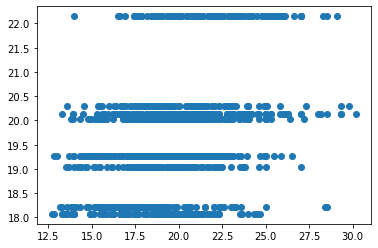

In [8]:
tuned_tree = DecisionTreeRegressor(max_depth=5, max_features='sqrt', max_leaf_nodes=90, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter='best')

tuned_tree.fit(X1_train, y1_train)
tuned_tree_pred1 = tuned_tree.predict(X1_test)

import matplotlib.pyplot as plt

plt.scatter(y1_test, tuned_tree_pred1)

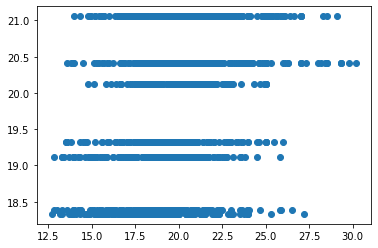

In [9]:
tuned_tree.fit(X2_train, y2_train)
tuned_tree_pred2 = tuned_tree.predict(X2_test)

plt.scatter(y2_test, tuned_tree_pred2)

In [10]:
from sklearn import metrics

print("Residual sum of squares: %.2f" % np.mean((tuned_tree_pred1 - y1_test) ** 2))
print('R2:', metrics.r2_score(y1_test,tuned_tree_pred1))
print('MAE:', metrics.mean_absolute_error(y1_test,tuned_tree_pred1))
print('MSE:', metrics.mean_squared_error(y1_test, tuned_tree_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, tuned_tree_pred1)))

Residual sum of squares: 6.70
R2: 0.14140573702391812
MAE: 1.9925912724380506
MSE: 6.69806209360424
RMSE: 2.588061454758028


In [11]:
print("Residual sum of squares: %.2f" % np.mean((tuned_tree_pred2 - y2_test) ** 2))
print('R2:', metrics.r2_score(y2_test,tuned_tree_pred2))
print('MAE:', metrics.mean_absolute_error(y2_test,tuned_tree_pred2))
print('MSE:', metrics.mean_squared_error(y2_test, tuned_tree_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, tuned_tree_pred2)))

Residual sum of squares: 7.08
R2: 0.09264577608779889
MAE: 2.0510902968350737
MSE: 7.078448103755045
RMSE: 2.6605353039858435


In [12]:
from sklearn.model_selection import cross_val_score

print("Cross validation mean MSE score using tuned_Tree1 is %s" % (
            -1 * cross_val_score(tuned_tree, X1_train, y1_train, cv=5,scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using tuned_Tree1 is %s" % (
    cross_val_score(tuned_tree, X1_train, y1_train, cv=5, scoring='r2').mean()))

print("Cross validation mean MSE score using tuned_Tree2 is %s" % (
            -1 * cross_val_score(tuned_tree, X2_train, y2_train, cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using tuned_Tree2 is %s" % (
    cross_val_score(tuned_tree, X2_train, y2_train, cv=5, scoring='r2').mean()))

Cross validation mean MSE score using tuned_Tree1 is 1.9013744765917635
Cross validation mean R2 score using tuned_Tree1 is 0.16061693338630917
Cross validation mean MSE score using tuned_Tree2 is 1.9604334529758858
Cross validation mean R2 score using tuned_Tree2 is 0.1195896764562088


In [13]:
from sklearn.svm import SVR
from scipy.stats import uniform as sp_randFloat

SVR_model = SVR()
spaceSVR = {
    'kernel' : ['linear', 'rbf'],
    'C' : sp_randFloat(0,10),
    'gamma' : ["auto", "scale"]
}

In [14]:
from sklearn.model_selection import RandomizedSearchCV

SVRSearch = RandomizedSearchCV(SVR_model, spaceSVR, n_iter=500, scoring='neg_mean_absolute_error', cv=3, random_state=0, n_jobs=-1, verbose = 3)

In [15]:
SVR_result_tot = SVRSearch.fit(X1_val, y1_val)
SVR_result = SVRSearch.fit(X2_val, y2_val)

print('Best Score TOT: %s' % SVR_result_tot.best_score_)
print('Best Hyperparameters TOT: %s' % SVR_result_tot.best_params_)

print('Best Score: %s' % SVR_result.best_score_)
print('Best Hyperparameters: %s' % SVR_result.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Best Score TOT: -1.6684018846490292
Best Hyperparameters TOT: {'C': 5.771402440203418, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: -1.6684018846490292
Best Hyperparameters: {'C': 5.771402440203418, 'gamma': 'auto', 'kernel': 'rbf'}


In [16]:
tuned_SVR = SVR(kernel = 'rbf', C=5.7714, gamma = 'auto')

In [17]:
tuned_SVR.fit(X1_train, y1_train)
SVR_pred1 = tuned_SVR.predict(X1_test)

print("Residual sum of squares: %.2f" % np.mean((SVR_pred1 - y1_test) ** 2))
print('Variance score: %.2f' % tuned_SVR.score(X1_test, y1_test))

tuned_SVR.fit(X2_train, y2_train)
SVR_pred2 = tuned_SVR.predict(X2_test)

print("Residual sum of squares: %.2f" % np.mean((SVR_pred2 - y2_test) ** 2))
print('Variance score: %.2f' % tuned_SVR.score(X2_test, y2_test))

Residual sum of squares: 4.80
Variance score: 0.38
Residual sum of squares: 4.76
Variance score: 0.39


In [18]:
print("Cross validation mean MSE score using SVR1 is %s" % (
            -1 * cross_val_score(tuned_SVR, X1_train, y1_train, cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using SVR1 is %s" % (
    cross_val_score(tuned_SVR, X1_train, y1_train, cv=5, scoring='r2').mean()))

print("Cross validation mean MSE score using SVR2 is %s" % (
            -1 * cross_val_score(tuned_SVR, X2_train, y2_train, cv=5, scoring='neg_mean_absolute_error').mean()))
print("Cross validation mean R2 score using SVR2 is %s" % (
    cross_val_score(tuned_SVR, X2_train, y2_train, cv=5, scoring='r2').mean()))

Cross validation mean MSE score using SVR1 is 1.5669730143614775
Cross validation mean R2 score using SVR1 is 0.3834521488449492
Cross validation mean MSE score using SVR2 is 1.5562976545921876
Cross validation mean R2 score using SVR2 is 0.3889653345048186


In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = "best",forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X2_train, y2_train)

In [34]:
sfs1.k_feature_names_

('0',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '16',
 '18',
 '19',
 '26',
 '27',
 '29',
 '30',
 '31',
 '33',
 '34',
 '35',
 '36')

In [37]:
selected_features = X_scaler1[list(sfs1.k_feature_names_)]
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(selected_features, y)
sfs_model = LinearRegression().fit(X_train_sf, y_train_sf)
sfs_model.score(X_test_sf, y_test_sf)

0.25796329313589683

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

clf = LinearRegression()

# Build step forward feature selection
sfs2 = sfs(clf,k_features = "best",forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs2 = sfs2.fit(X1_train, y1_train)

In [40]:
selected_features = X_scaler_df_TOTdrop[list(sfs2.k_feature_names_)]
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(selected_features, y)
sfs_model = LinearRegression().fit(X_train_sf, y_train_sf)
sfs_model.score(X_test_sf, y_test_sf)

0.24318706534416012

In [50]:
pd.DataFrame([sfs_model.coef_], columns=list(sfs2.k_feature_names_))

,TOT_APENR_M,TOT_APEXAM_NONE_M,TOT_ALGENR_GS0910_M,TOT_MATHENR_ALG2_M,TOT_MATHENR_CALC_M,TOT_DUAL_M,TOT_LEPENR_M,TOT_504ENR_M,TOT_DISCWODIS_EXPWE_M,TOT_DISCWODIS_EXPWOE_M,TOT_DISCWODIS_EXPZT_M,TOT_DISCWDIS_EXPWE_IDEA_F,TOT_DISCWDIS_EXPWOE_IDEA_F,TOT_GTENR_M,TOT_RET_G09_M,TOT_RET_G12_M,TOT_SATACT_M,TOT_SSSPORTS,TOT_SSPART,TOT_DISCWDIS_TFRALT_IDEA_M
0,0.756234,-0.058656,-0.163718,-0.078318,0.461879,0.134065,-0.518511,0.316989,-0.18456,-0.110954,0.059249,0.006487,0.09589,0.166095,-0.48501,-0.138297,-0.168725,0.21374,0.309946,0.098438


In [45]:
sfs2.k_feature_names_

('TOT_APENR_M',
 'TOT_APEXAM_NONE_M',
 'TOT_ALGENR_GS0910_M',
 'TOT_MATHENR_ALG2_M',
 'TOT_MATHENR_CALC_M',
 'TOT_DUAL_M',
 'TOT_LEPENR_M',
 'TOT_504ENR_M',
 'TOT_DISCWODIS_EXPWE_M',
 'TOT_DISCWODIS_EXPWOE_M',
 'TOT_DISCWODIS_EXPZT_M',
 'TOT_DISCWDIS_EXPWE_IDEA_F',
 'TOT_DISCWDIS_EXPWOE_IDEA_F',
 'TOT_GTENR_M',
 'TOT_RET_G09_M',
 'TOT_RET_G12_M',
 'TOT_SATACT_M',
 'TOT_SSSPORTS',
 'TOT_SSPART',
 'TOT_DISCWDIS_TFRALT_IDEA_M')

In [1]:
clf = LinearRegression()

# Build step forward feature selection
sfs3 = sfs(clf,k_features = "best",forward=True,floating=False, scoring='r2',cv=5)
X_train, X_test, y_train, y_test = train_test_split(high_schools.drop(['LEA_STATE_NAME','LEA_NAME','ACT'], axis=1), y)

# Perform SFFS
sfs2 = sfs3.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [ ]:
selected_features = X_scaler_df_TOTdrop[list(sfs3.k_feature_names_)]
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(selected_features, y)
sfs_model = LinearRegression().fit(X_train_sf, y_train_sf)
sfs_model.score(X_test_sf, y_test_sf)

In [ ]:
pd.DataFrame([sfs_model.coef_], columns=list(sfs3.k_feature_names_))